In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import math
% matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['figure.autolayout'] = 'true'

In [107]:
name = '4'

train = np.loadtxt('data/data'+name+'_train.csv')
X = train[:,0:2]
Y = train[:,2:3]

validate = np.loadtxt('data/data'+name+'_validate.csv')
Xval = validate[:,0:2]
Yval = validate[:,2:3]

In [61]:
class GD(object):
    
    def __init__(self, x0, objective,
                 gradient,
                 step_size=1e-1):
        self.x0 = x0
        self.objective = objective
        self.gradient = gradient
        self.step_size = step_size
        
    def compute_gradient(self, x, idx=None, eps=1e-6):
        if self.gradient != None:
            return self.gradient(x)
    
    def step(self, n_iter=-1, stochastic=False, gtol=1e-1):
        log = []
        while n_iter != 0:
            n_iter -= 1
            grad = self.compute_gradient(self.x0)
            log.append((self.x0, grad))
            if np.linalg.norm(grad) < gtol:
                break
            self.x0 = self.x0 - self.step_size * grad
            print self.x0, grad
        return log

In [62]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))
def dot_p(w, x):
    return w[0] + w[1:].dot(x)

In [63]:
def Objective(X, Y, L):
    def obj(W):
        return L*W[1:].dot(W[1:])-sum([y*math.log(sigmoid(dot_p(W,x))) + (1-y)*math.log(1-sigmoid(dot_p(W,x))) for x,y in zip(X, Y)])
    return obj

def Gradient(X, Y, L):
    def grad(W):
        reg = np.append(np.array([0.0]), 2*L*W[1:])
        return reg + sum([(sigmoid(dot_p(W,x))-y)*np.append(np.array([1.0]), x) for x,y in zip(X, Y)])
    return grad

In [64]:
w0 = np.array([0.0, 0.0, 0.0])

In [65]:
L = 1.0
objective = Objective(X,Y,L)
gradient = Gradient(X,Y,L)

optimizer = GD(w0, objective, gradient, 1e-1)
log_R = optimizer.step(1500)

L = 0.0
objective = Objective(X,Y,L)
gradient = Gradient(X,Y,L)

optimizer = GD(w0, objective, gradient, 1e-1)
log_U = optimizer.step(1500)

[-19.8          0.10902189  78.72921202] [ 198.           -1.09021894 -787.29212023]
[ -39.22511332   -0.35890659  102.78777265] [ 194.25113321    4.67928489 -240.58560625]
[ -58.33504685   -0.62601174  122.13404986] [ 191.09933533    2.67105142 -193.46277214]
[ -7.70618643e+01  -1.36823676e-01   1.37784193e+02] [ 187.26817476   -4.89188061 -156.50143161]
[ -95.56946125    0.34002438  150.41721845] [ 185.07596923   -4.76848058 -126.33025429]
[-113.68033902    0.41482825  160.75992353] [ 181.10877763   -0.7480387  -103.42705077]
[-131.66824332    0.26463839  169.11834763] [ 179.87904306    1.50189862  -83.58424097]
[ -1.49376117e+02   2.02938775e-02   1.76015838e+02] [ 177.07874105    2.44344512  -68.97490045]
[-166.52804843    0.5703481   181.99018099] [ 171.51931003   -5.5005422   -59.74343322]
[-183.34041591    1.41343206  187.06966832] [ 168.12367483   -8.43083959  -50.79487332]
[-199.74997935    2.38108233  191.51418055] [ 164.09563433   -9.6765027   -44.44512226]
[-215.87534205   

/home/shankha/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


[-384.66024851    8.4131702   228.71715003] [  1.18333378e+02   7.32410899e-02  -3.12582731e+01]
[-396.03640612    8.28398538  231.98412426] [ 113.76157605    1.29184819  -32.66974234]
[-407.14608762    8.22377188  235.04662287] [ 111.096815      0.60213501  -30.62498605]
[-418.02637331    8.29854546  237.88770998] [ 108.80285698   -0.7477358   -28.4108711 ]
[-428.53475052    8.68316674  240.79704784] [ 105.08377209   -3.84621284  -29.09337862]
[-438.94294496    9.17068481  243.29512536] [ 104.08194437   -4.87518066  -24.98077515]
[-449.14685957    9.3791985   245.66737092] [ 102.03914605   -2.08513694  -23.72245568]
[-459.20944182    9.74417331  247.81393386] [ 100.62582256   -3.64974807  -21.46562938]
[-469.00762742   10.29029688  250.00956933] [ 97.98185593  -5.46123575 -21.95635466]
[-478.45400981   10.66208558  252.42398907] [ 94.4638239   -3.71788696 -24.14419743]
[-487.65699783   10.68393085  254.82573607] [ 92.02988021  -0.21845267 -24.01747004]
[-496.75900472   10.81291231  25

/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:1742: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


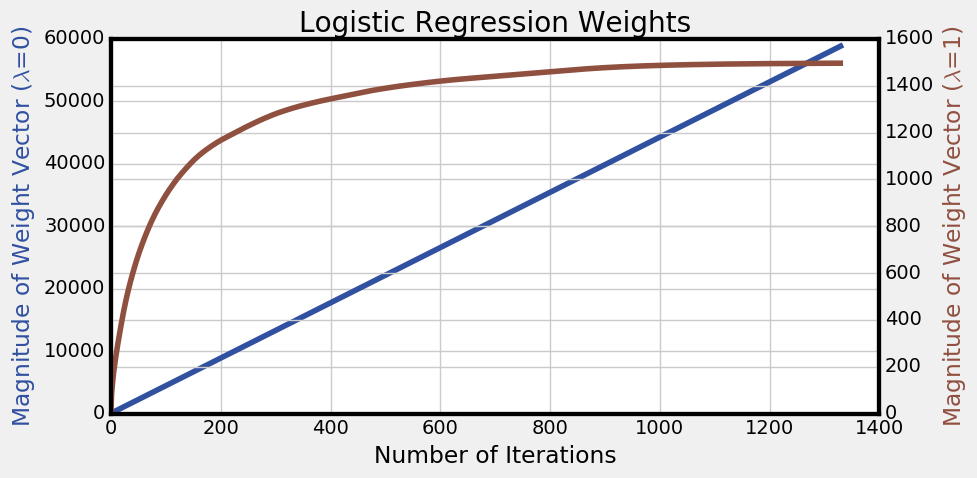

In [66]:
blue = '#3050A0'
red = '#905040'
xx = range(len(log_R))
yy_R = [np.linalg.norm(log_R[i][0]) for i in xx]
yy_U = [np.linalg.norm(log_U[i][0]) for i in xx]
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 5)
ax1.plot(xx, yy_U, c=blue)
ax1.set_ylabel('Magnitude of Weight Vector ('+r'$\lambda$'+'=0)', color=blue)
ax2 = ax1.twinx()
ax2.plot(xx, yy_R, c=red)
ax2.set_ylabel('Magnitude of Weight Vector ('+r'$\lambda$'+'=1)', color=red)
ax1.set_xlabel('Number of Iterations')
plt.title('Logistic Regression Weights')
plt.show()

In [125]:
def evaluate(L, penalty='l1'):
    C = 1.0/L
    clf = LogisticRegression(C=C, penalty=penalty)
    clf.fit(X, Y)
    return clf

In [130]:
def make_classifiers(end=5.0, granularity=100, beg=1e-8):
    L_arr = np.linspace(beg, end, granularity)[1:]
    #L_arr = 2**np.linspace(-2.0, 5.0, 100)
    clf_arr_l1 = [evaluate(L, penalty = 'l1') for L in L_arr]
    clf_arr_l2 = [evaluate(L, penalty = 'l2') for L in L_arr]
    return L_arr, clf_arr_l1, clf_arr_l2

In [134]:
def plot_part2(fn, end, granularity, ylabel):
    plt.figure(figsize=(10,6))
    L_arr, clf_arr_l1, clf_arr_l2 = make_classifiers(end=end, granularity=granularity)
    xx = L_arr[:]
    yy1 = [fn(clf) for clf in clf_arr_l1]
    yy2 = [fn(clf) for clf in clf_arr_l2]
    plt.plot(xx, yy1, label='L1')
    plt.plot(xx, yy2, label='L2')
    plt.legend(fontsize=30)
    plt.xlabel('Lambda', fontsize=25)
    plt.ylabel(ylabel, fontsize=25)
    plt.show()

In [135]:
def weight_norm(clf):
    return np.linalg.norm(np.append(clf.__dict__["intercept_"], clf.__dict__["coef_"]))
def class_error(clf):
    return clf.score(Xval, Yval)

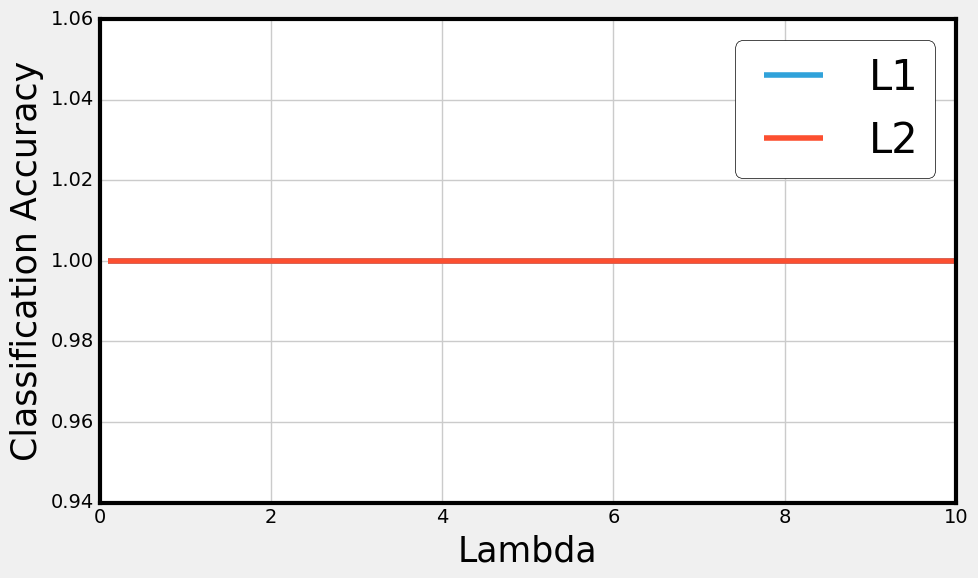

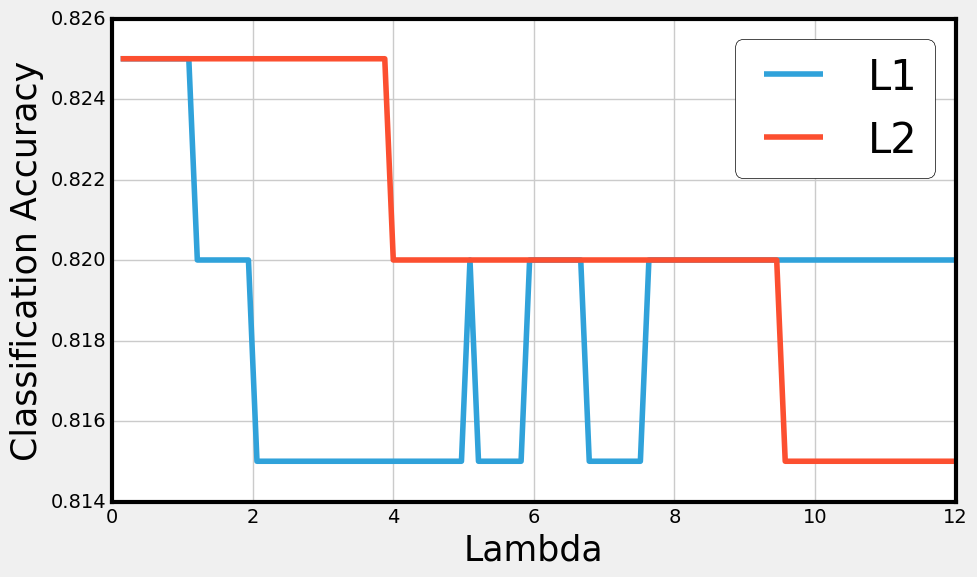

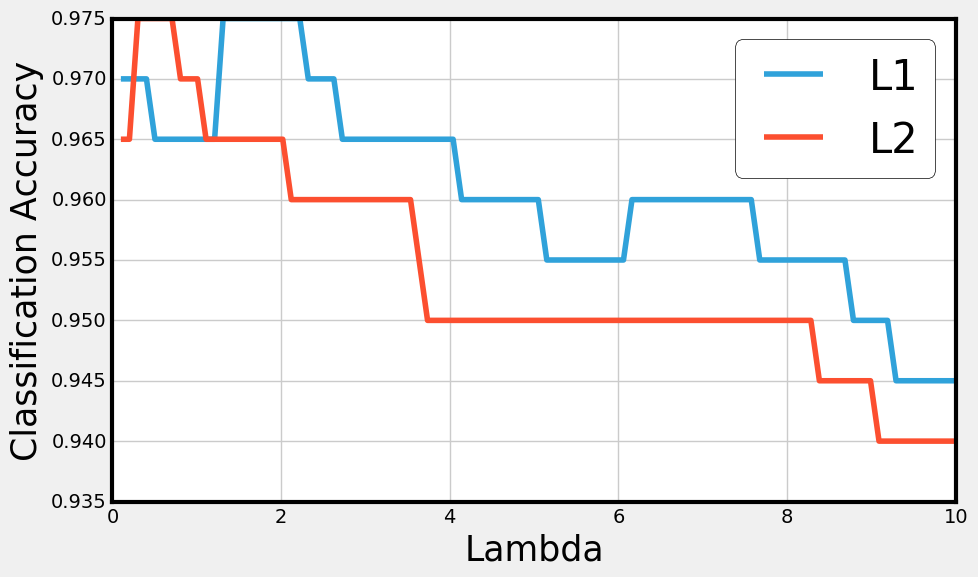

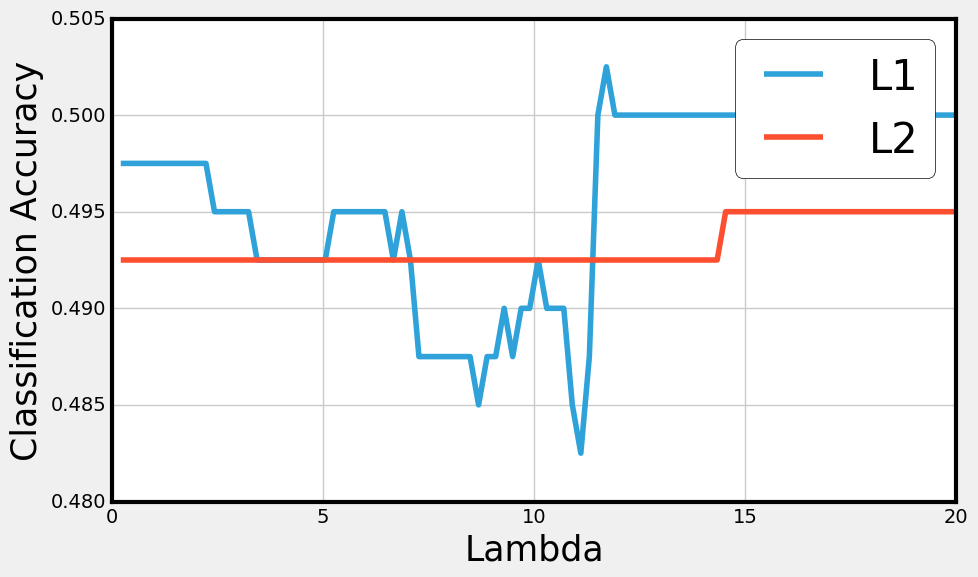

In [139]:
end_arr = [10.0, 12.0, 10.0, 20.0]
granularity = 100
ylabel = 'Classification Accuracy'
for i in range(4):
    name = str(i+1)
    train = np.loadtxt('data/data'+name+'_train.csv')
    X = train[:,0:2]
    Y = train[:,2:3]

    validate = np.loadtxt('data/data'+name+'_validate.csv')
    Xval = validate[:,0:2]
    Yval = validate[:,2:3]
    
    plot_part2(class_error, end_arr[i], granularity, ylabel)

In [144]:
def best_lambda(name):
    end = 9.99
    name = str(name)
    train = np.loadtxt('data/data'+name+'_train.csv')
    X = train[:,0:2]
    Y = train[:,2:3]

    validate = np.loadtxt('data/data'+name+'_validate.csv')
    Xval = validate[:,0:2]
    Yval = validate[:,2:3]

    test = np.loadtxt('data/data'+name+'_test.csv')
    Xtest = test[:,0:2]
    Ytest = test[:,2:3]
    
    penalties = ['l1', 'l2']
    
    def score(params):
        L,penalty = params
        clf = LogisticRegression(C=1.0/L, penalty=penalty)
        clf.fit(X,Y.ravel())
        return clf.score(Xval, Yval), clf.score(Xtest, Ytest)
    
    L_arr = np.linspace(0.0, end, 1000)[1:]
    params = [(L, 'l2') for L in L_arr]+[(L, 'l1') for L in L_arr]
    params.reverse()
    
    param = max(params, key=lambda param: score(param)[0])
    
    return param, score(param)[1]

In [143]:
[best_lambda(i) for i in range(1,5)]

[((9.9900000000000002, 'l2'), 1.0),
 ((3.8900000000000001, 'l2'), 0.81000000000000005),
 ((0.71999999999999997, 'l2'), 0.96999999999999997),
 ((2.3700000000000001, 'l1'), 0.5)]

In [145]:
[best_lambda(i) for i in range(1,5)]

[((9.9900000000000002, 'l1'), 0.995),
 ((1.1799999999999999, 'l1'), 0.81000000000000005),
 ((2.3100000000000001, 'l1'), 0.96499999999999997),
 ((2.3500000000000001, 'l1'), 0.5)]

In [5]:
x = np.array(range(5))
(x**2 + 2*x + 1)%5

array([1, 4, 4, 1, 0])

In [ ]:
hh